# Attention weights over the heads


Generates Figure 3 of the paper *Attention Meets Post-hoc Interpretability: A Mathematical Perspective*. 

In [1]:
import os
import pickle
import itertools 

import torch
import numpy as np

import math
from lime import lime_text

import re

In [2]:
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import transforms
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
import matplotlib.colors as colors

import matplotlib.pyplot as plt

In [3]:
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)
plt.rcParams.update({'font.size': 18})

In [4]:
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

In [5]:
import sys
sys.path.append("C:/Users/gianl/Anaconda3/bin")

In [6]:
from models.utils import get_g_values
from models.utils import scaled_dot_product
from data.dataset import Dataset
import params

In [7]:
from utils.plots import plot_exp

In [8]:
# Check if CUDA is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define model name and path
model_name = 'multi_head_e\\model'
model_path = os.path.join('.', 'models', 'saved', 'IMDB', model_name)

# Load the classifier model
with open(os.path.join(model_path, 'classifier.pkl'), 'rb') as inp:
    classifier = pickle.load(inp)
print(f"Model loaded successfully from: {model_path}")

Using device: cpu
Model loaded successfully from: .\models\saved\IMDB\multi_head_e\model


In [9]:
n_heads = len(classifier.heads)

In [10]:
example = "attention based explanations are popular but questionable"

tokens = classifier.tokenizer(example)

In [11]:
print(example)
print(f'Prediction: {classifier.predict_proba([example])}')

attention based explanations are popular but questionable
Prediction: [[-0.64168686  0.58398646]]


## Attention 

In [12]:
attention, attn_heads, attn_model, attn_exp = classifier.get_attention_exp(example)
print(attn_exp)

{'popular': 0.13757623732089996, 'questionable': 0.10408841818571091, 'based': 0.07760432362556458, 'explanations': 0.05953999236226082, 'but': 0.03555268421769142, 'are': 0.014360223896801472, 'attention': 0.01219672430306673}


In [13]:
attention.shape

torch.Size([6, 1, 256, 256])

In [14]:
attention = attention.squeeze(dim=1)
attention.shape

torch.Size([6, 256, 256])

In [15]:
attn = attention.detach().numpy()

In [16]:
labels = ['[CLS]'] + tokens 
num_tokens = len(labels)
print(labels)

['[CLS]', 'attention', 'based', 'explanations', 'are', 'popular', 'but', 'questionable']


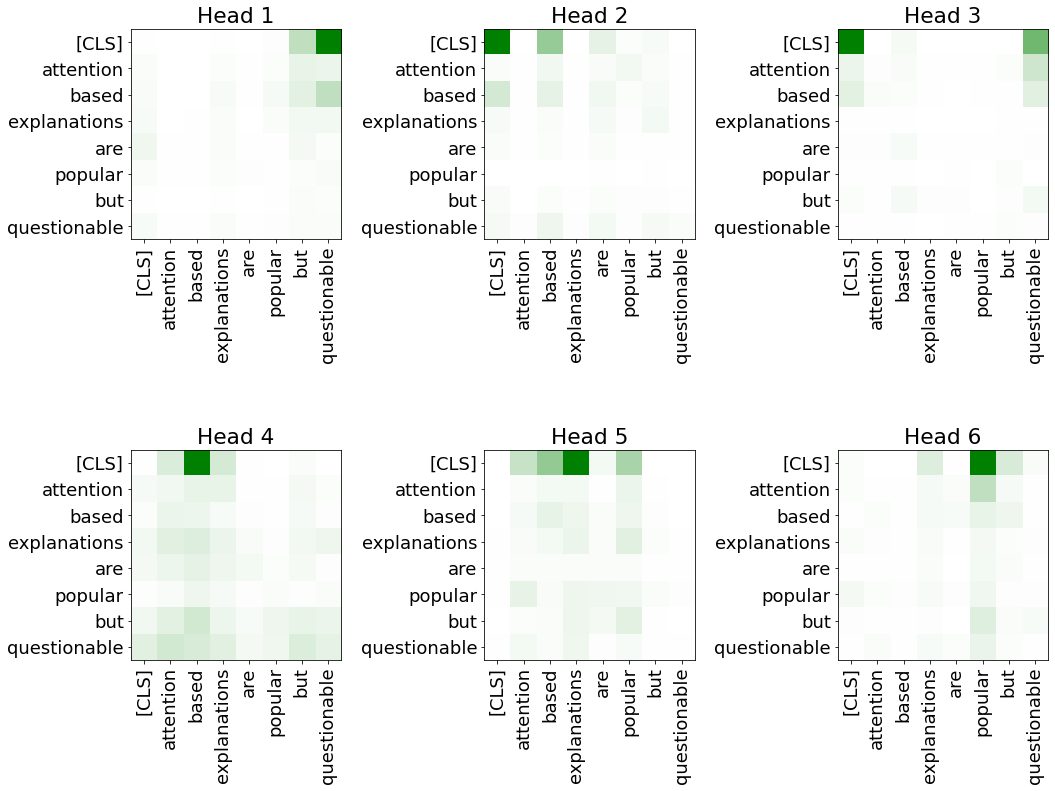

In [17]:
# Create a custom colormap
cmap = colors.LinearSegmentedColormap.from_list("", ["white", "green"])

fig, axs = plt.subplots(2, 3, figsize=(15, 12))
plt.title('Attention matrices of the heads.')

for i in range(n_heads):
    ax = axs[i//3, i%3]  # Determine the row and column number
    cax = ax.matshow(attn[i][:num_tokens, :num_tokens], cmap=cmap)
    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels)  # Set the y-ticks to be the ith element of 'labels'
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=90)  # Set the x-ticks to be the ith element of 'labels'
    ax.xaxis.tick_bottom()  # Ensure x-axis ticks are at the bottom
    ax.set_title(f'Head {i+1}')
    #fig.colorbar(cax, ax=ax)

plt.tight_layout()
plt.savefig("results/paper/attention_heads.pdf", format='pdf', bbox_inches='tight')  # Save the figure in PDF format
plt.show()